# Import libraries

In [1]:
import math
import matplotlib.pyplot as plt
import random

# Define Euclidean distance

In [2]:
def getEuclidean(point1, point2):
    dimension = len(point1)
    dist = 0.0
    for i in range(dimension):
        dist += (point1[i] - point2[i]) ** 2
    return math.sqrt(dist)

# Define K-means function

In [3]:
def k_means(dataset, k, iteration):
    # initialize k center vectors
    index = random.sample(list(range(len(dataset))), k)
    vectors = []
    for i in index:
        vectors.append(dataset[i])
        
    # initialize labels
    labels = []
    for i in range(len(dataset)):
        labels.append(-1)
        
    # iterate k-means process
    while(iteration > 0):
        C = []
        for i in range(k):
            C.append([])
        for labelIndex, item in enumerate(dataset):
            classIndex = -1
            minDist = 1e6
            for i, point in enumerate(vectors):
                dist = getEuclidean(item, point)
                if(dist < minDist):
                    classIndex = i
                    minDist = dist
            C[classIndex].append(item)
            labels[labelIndex] = classIndex
            
        for i, cluster in enumerate(C):
            clusterHeart = []
            dimension = len(dataset[0])
            for j in range(dimension):
                clusterHeart.append(0)
            for item in cluster:
                for j, coordinate in enumerate(item):
                    clusterHeart[j] += coordinate / len(cluster)
            vectors[i] = clusterHeart
        iteration -= 1
    return C, labels

# create data and test K-means algorithm

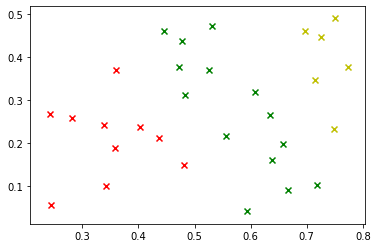

[1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2]


In [5]:
# 数据集：每三个是一组分别是西瓜的编号，密度，含糖量
data = """
    1,0.697,0.46,2,0.774,0.376,3,0.634,0.264,4,0.608,0.318,5,0.556,0.215,
    6,0.403,0.237,7,0.481,0.149,8,0.437,0.211,9,0.666,0.091,10,0.243,0.267,
    11,0.245,0.057,12,0.343,0.099,13,0.639,0.161,14,0.657,0.198,15,0.36,0.37,
    16,0.593,0.042,17,0.719,0.103,18,0.359,0.188,19,0.339,0.241,20,0.282,0.257,
    21,0.748,0.232,22,0.714,0.346,23,0.483,0.312,24,0.478,0.437,25,0.525,0.369,
    26,0.751,0.489,27,0.532,0.472,28,0.473,0.376,29,0.725,0.445,30,0.446,0.459

    """
 
# 数据处理 dataset是30个样本（密度，含糖量）的列表
a = data.split(',')
dataset = [[float(a[i]), float(a[i+1])] for i in range(1, len(a)-1, 3)]
C, labels = k_means(dataset, 3, 20)
 
colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
for i in range(len(C)):
    coo_X = []                                 # x坐标列表
    coo_Y = []                                 # y坐标列表
    for j in range(len(C[i])):
        coo_X.append(C[i][j][0])
        coo_Y.append(C[i][j][1])
    plt.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)
 
# plt.legend(loc='upper right')
plt.show()
print(labels)